In [14]:
import pandas as pd
df = pd.read_csv('/Users/jono/Downloads/reactivation.csv')
df2 = pd.read_csv('/Users/jono/Downloads/DAILY_ANALYSIS.csv')

In [17]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10782 entries, 0 to 10781
Columns: 151 entries, DRIVER_ID to IN_COMMS
dtypes: int64(148), object(3)
memory usage: 12.4+ MB


In [18]:
df2.describe()

,DRIVER_ID,LAST_4W,X_VALUE,Y_VALUE,ORDER_COUNT,PRE_D70,PRE_D69,PRE_D68,PRE_D67,PRE_D66,...,POST_D63,POST_D64,POST_D65,POST_D66,POST_D67,POST_D68,POST_D69,POST_D70,POST_D71,IN_COMMS
count,10782.000000,10782.000000,10782.000000,10782.000000,10782.000000,10782.000000,10782.000000,10782.00000,10782.000000,10782.000000,...,10782.000000,10782.000000,10782.000000,10782.000000,10782.000000,10782.000000,10782.000000,10782.000000,10782.000000,10782.000000
mean,611659.978483,121.208310,32.255147,128.569839,512.147190,3.205899,3.272398,3.02532,2.094695,2.122519,...,1.192636,1.112688,1.107030,0.754591,0.708588,0.742627,0.819329,0.906047,0.858653,0.467353
std,242981.757763,160.207914,18.421099,73.723844,764.244727,7.525567,7.942896,7.64923,5.864724,5.886358,...,4.315269,4.202972,4.373721,3.457302,3.299540,3.346191,3.487240,3.794995,3.632560,0.498956
min,10.000000,1.000000,10.000000,20.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,435304.500000,10.000000,10.000000,40.000000,23.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,645176.500000,46.000000,50.000000,100.000000,150.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,841430.750000,179.000000,50.000000,200.000000,700.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,979925.000000,1107.000000,50.000000,200.000000,6619.000000,59.000000,72.000000,63.00000,61.000000,48.000000,...,41.000000,45.000000,45.000000,44.000000,40.000000,39.000000,37.000000,43.000000,45.000000,1.000000


In [19]:
# Calculate Total Cost for Group A
import numpy as np # Import numpy for isnan check

# Identify XP columns (D0 to D14)
xp_cols = [f'XP_D{i}' for i in range(15)]

# Ensure df2 is loaded and contains necessary columns like 'SOURCE', 'GROUP_FIXED', 'X_VALUE', 'Y_VALUE', and xp_cols
# (Assuming df2 was loaded correctly in the first cell)

# Check if required columns exist
required_cols = ['SOURCE', 'GROUP_FIXED', 'X_VALUE', 'Y_VALUE'] + xp_cols
missing_req_cols = [col for col in required_cols if col not in df2.columns]

if missing_req_cols:
    print(f"Error: Missing required columns in df2: {missing_req_cols}")
    total_cost_a = 'Error'
else:
    # Filter for Group A ('Reactivation' Source and 'A' Group_Fixed)
    # Handle potential NaN values in GROUP_FIXED
    df_group_a = df2[(df2['SOURCE'] == 'Reactivation') & (df2['GROUP_FIXED'] == 'A')].copy()

    # Check if df_group_a is empty
    if df_group_a.empty:
        print("No data found for Reactivation Group A.")
        total_cost_a = 0
        eligible_riders_a = pd.DataFrame() # Define empty df for later print statement
    else:
        # Calculate total orders during XP for each rider in Group A
        # Ensure XP columns are numeric, coercing errors to NaN
        for col in xp_cols:
             df_group_a[col] = pd.to_numeric(df_group_a[col], errors='coerce')
        df_group_a['total_xp_orders'] = df_group_a[xp_cols].sum(axis=1, skipna=False) # Don't skip NaN sums initially

        # Ensure X_VALUE and Y_VALUE are numeric
        df_group_a['X_VALUE'] = pd.to_numeric(df_group_a['X_VALUE'], errors='coerce')
        df_group_a['Y_VALUE'] = pd.to_numeric(df_group_a['Y_VALUE'], errors='coerce')

        # Filter riders who met their XP order target
        # Requires total_xp_orders and X_VALUE to be non-NaN
        eligible_condition = (df_group_a['total_xp_orders'] >= df_group_a['X_VALUE']) & \
                             (~df_group_a['total_xp_orders'].isna()) & \
                             (~df_group_a['X_VALUE'].isna())
        eligible_riders_a = df_group_a[eligible_condition]

        # Calculate the total cost (sum of Y_VALUE for eligible riders)
        # Requires Y_VALUE to be non-NaN
        total_cost_a = eligible_riders_a['Y_VALUE'].sum(skipna=True)


    print(f"Total Incentive Cost for Group A: £{total_cost_a}")
    # Print some info about Group A for verification
    print(f"Number of riders in Group A: {len(df_group_a)}")
    if not df_group_a.empty and 'total_xp_orders' in df_group_a.columns:
        print(f"Number of Group A riders meeting target: {len(eligible_riders_a)}")
        print(f"Number of Group A riders with NaN Y_VALUE meeting target: {eligible_riders_a['Y_VALUE'].isna().sum()}")


Error: Missing required columns in df2: ['SOURCE']


In [20]:
import pandas as pd

# Read the CSV, explicitly stating there's no index column in the file itself
# This ensures the first column ('SOURCE') is treated as data
df2 = pd.read_csv('/Users/jono/Downloads/DAILY_ANALYSIS.csv', index_col=None)

# Print the first 5 rows to see the structure and headers
print("--- df2 head ---")
print(df2.head())
print("\\n--- df2 columns ---")
# Print the list of column names pandas recognized
print(df2.columns)

# Keep the old df load if needed, or remove it
# df = pd.read_csv('/Users/jono/Downloads/reactivation.csv')

--- df2 head ---
         SOURCE COUNTRY_NAME  DRIVER_ID  START_DATE GROUP_FIXED    CITY  \
0  Reactivation      Ireland     834408  2025-02-21           B  Dublin   
1  Reactivation           UK      12951  2025-02-07           B  London   
2  Reactivation           UK     883178  2025-02-07           A  London   
3  Reactivation           UK     335760  2025-02-21           B  London   
4  Reactivation           UK     416964  2025-02-07           B  London   

  LAST_4W DAYS_SINCE_LAST_WORK X_VALUE Y_VALUE  ... POST_D62  POST_D63  \
0      34                  181      10      40  ...        0         0   
1      45                   74      25     100  ...        0         0   
2     195                   68      50     200  ...        0         0   
3     191                   34      50     200  ...        0         0   
4      29                  109      50     200  ...        0         0   

   POST_D64  POST_D65  POST_D66  POST_D67  POST_D68  POST_D69  POST_D70  \
0         0 

In [21]:
# Calculate Total Cost for Group A
import numpy as np # Import numpy for isnan check

# Identify XP columns (D0 to D14)
xp_cols = [f'XP_D{i}' for i in range(15)]

# Ensure df2 is loaded and contains necessary columns like 'SOURCE', 'GROUP_FIXED', 'X_VALUE', 'Y_VALUE', and xp_cols
# (Assuming df2 was loaded correctly in the first cell)

# Check if required columns exist
required_cols = ['SOURCE', 'GROUP_FIXED', 'X_VALUE', 'Y_VALUE'] + xp_cols
missing_req_cols = [col for col in required_cols if col not in df2.columns]

if missing_req_cols:
    print(f"Error: Missing required columns in df2: {missing_req_cols}")
    total_cost_a = 'Error'
else:
    # Filter for Group A ('Reactivation' Source and 'A' Group_Fixed)
    # Handle potential NaN values in GROUP_FIXED
    df_group_a = df2[(df2['SOURCE'] == 'Reactivation') & (df2['GROUP_FIXED'] == 'A')].copy()

    # Check if df_group_a is empty
    if df_group_a.empty:
        print("No data found for Reactivation Group A.")
        total_cost_a = 0
        eligible_riders_a = pd.DataFrame() # Define empty df for later print statement
    else:
        # Calculate total orders during XP for each rider in Group A
        # Ensure XP columns are numeric, coercing errors to NaN
        for col in xp_cols:
             df_group_a[col] = pd.to_numeric(df_group_a[col], errors='coerce')
        df_group_a['total_xp_orders'] = df_group_a[xp_cols].sum(axis=1, skipna=False) # Don't skip NaN sums initially

        # Ensure X_VALUE and Y_VALUE are numeric
        df_group_a['X_VALUE'] = pd.to_numeric(df_group_a['X_VALUE'], errors='coerce')
        df_group_a['Y_VALUE'] = pd.to_numeric(df_group_a['Y_VALUE'], errors='coerce')

        # Filter riders who met their XP order target
        # Requires total_xp_orders and X_VALUE to be non-NaN
        eligible_condition = (df_group_a['total_xp_orders'] >= df_group_a['X_VALUE']) & \
                             (~df_group_a['total_xp_orders'].isna()) & \
                             (~df_group_a['X_VALUE'].isna())
        eligible_riders_a = df_group_a[eligible_condition]

        # Calculate the total cost (sum of Y_VALUE for eligible riders)
        # Requires Y_VALUE to be non-NaN
        total_cost_a = eligible_riders_a['Y_VALUE'].sum(skipna=True)


    print(f"Total Incentive Cost for Group A: £{total_cost_a}")
    # Print some info about Group A for verification
    print(f"Number of riders in Group A: {len(df_group_a)}")
    if not df_group_a.empty and 'total_xp_orders' in df_group_a.columns:
        print(f"Number of Group A riders meeting target: {len(eligible_riders_a)}")
        print(f"Number of Group A riders with NaN Y_VALUE meeting target: {eligible_riders_a['Y_VALUE'].isna().sum()}")


Total Incentive Cost for Group A: £51280
Number of riders in Group A: 5280
Number of Group A riders meeting target: 388
Number of Group A riders with NaN Y_VALUE meeting target: 0


Converting START_DATE to datetime...
Melting based on 142 available day columns...
Value counts for Group column:
Group
Reactivation B    855834
Onboarding        829706
Reactivation A    749760
Name: count, dtype: int64
Calculating daily orders...
Calculating daily active riders...
Generating plots...


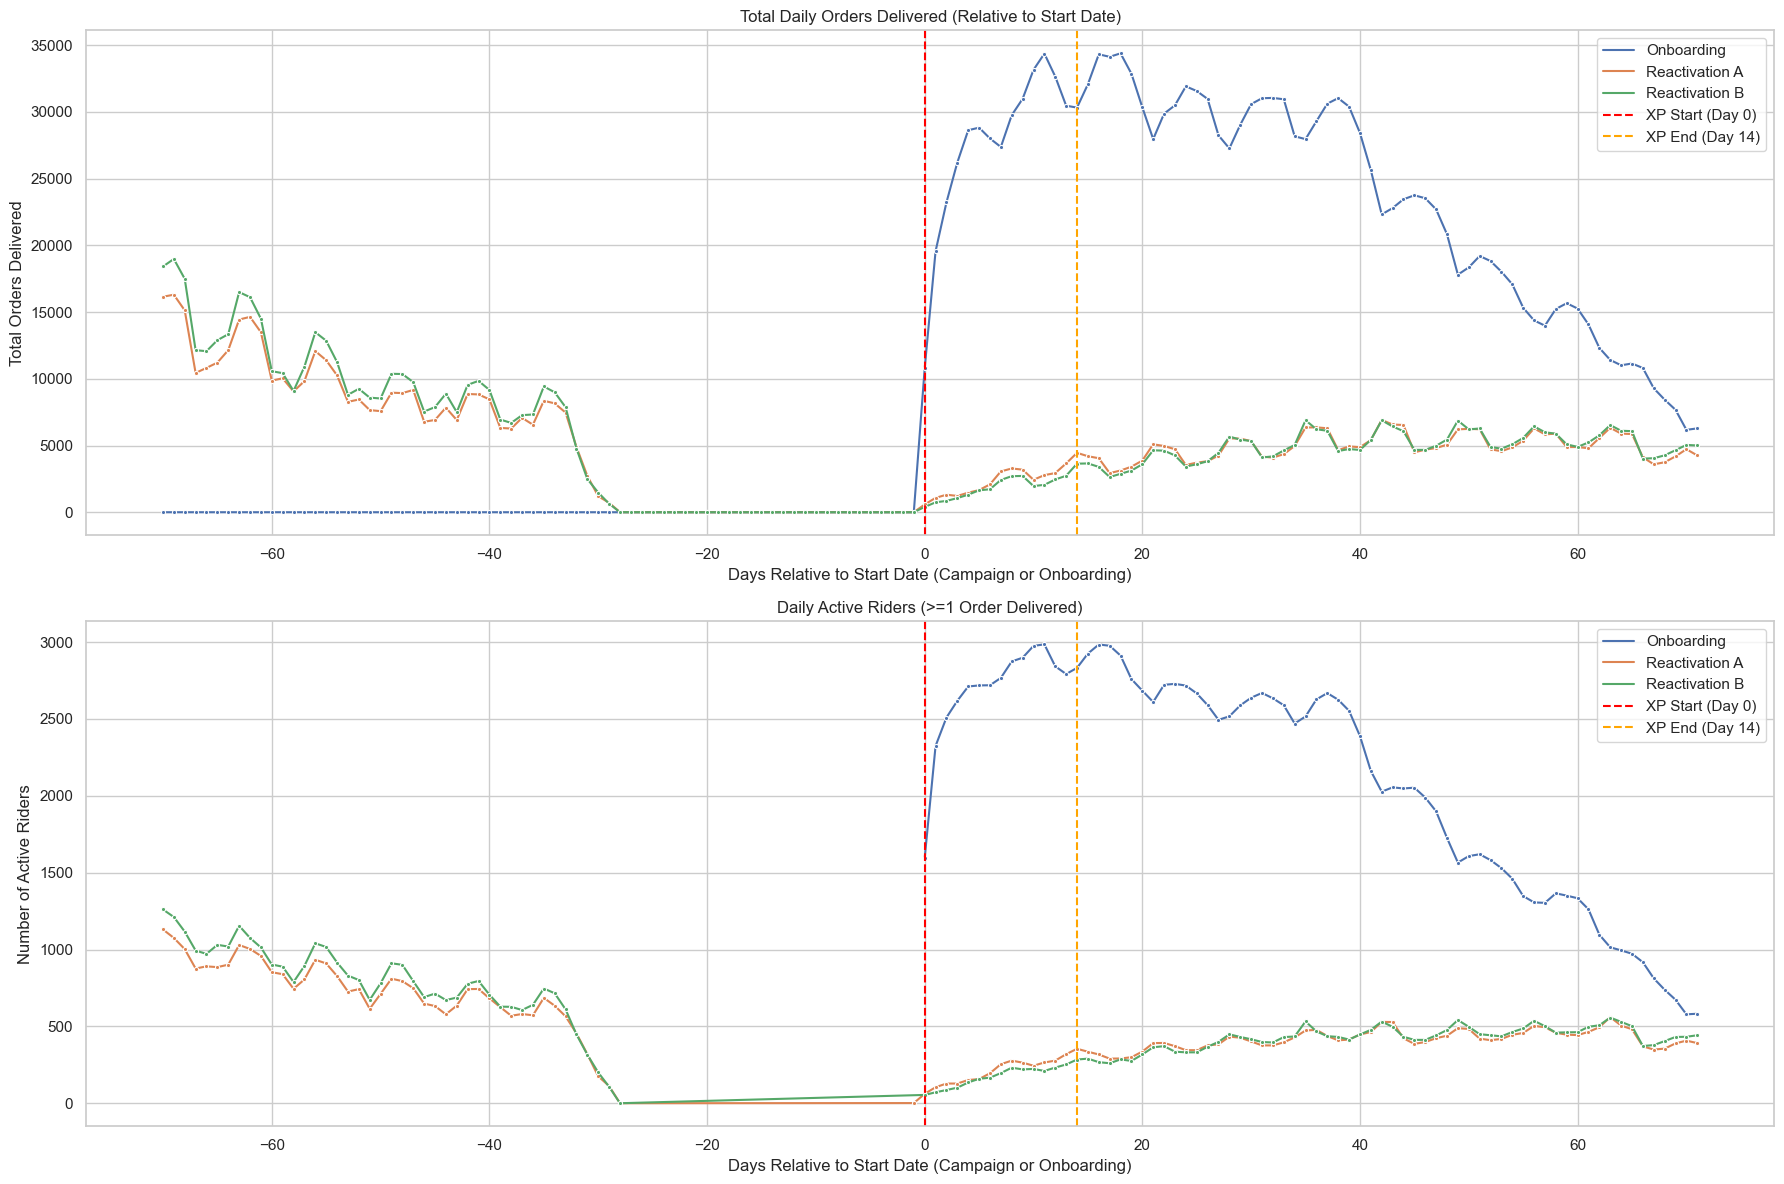

--- Daily Orders Head ---
        Group  Relative_Day  Orders
0  Onboarding           -70       0
1  Onboarding           -69       0
2  Onboarding           -68       0
3  Onboarding           -67       0
4  Onboarding           -66       0

--- Daily Active Riders Head ---
        Group  Relative_Day  Active_Riders
0  Onboarding             0           1595
1  Onboarding             1           2324
2  Onboarding             2           2509
3  Onboarding             3           2618
4  Onboarding             4           2711


In [22]:
# --- Step 2: Compare Daily Performance (Orders & Rider Count) --- 

import matplotlib.pyplot as plt
import seaborn as sns
import re # For parsing day numbers
import pandas as pd # Ensure pandas is imported

# Ensure START_DATE is datetime (might have been done already, but good practice)
if 'START_DATE' in df2.columns and not pd.api.types.is_datetime64_any_dtype(df2['START_DATE']):
     print("Converting START_DATE to datetime...")
     df2['START_DATE'] = pd.to_datetime(df2['START_DATE'], errors='coerce')
     # Drop rows where START_DATE conversion failed, if any
     df2.dropna(subset=['START_DATE'], inplace=True)


# --- Data Preparation: Reshape to Long Format ---

# Define all relevant day columns
pre_cols = [f'PRE_D{i}' for i in range(70, 0, -1)] # D70 to D1
xp_cols = [f'XP_D{i}' for i in range(15)]        # D0 to D14
post_cols = [f'POST_D{i}' for i in range(15, 72)] # D15 to D71
all_day_cols = pre_cols + xp_cols + post_cols

# Check if all day columns exist
available_day_cols = [col for col in all_day_cols if col in df2.columns]
missing_day_cols = [col for col in all_day_cols if col not in available_day_cols]
if missing_day_cols:
    print(f"Warning: Missing day columns, they will be skipped: {missing_day_cols}")
if not available_day_cols:
     print("Error: No day columns (PRE_D*, XP_D*, POST_D*) found in df2. Cannot proceed with plotting.")
     # Exit or handle appropriately
else:

    # Columns to keep when melting (ensure they exist)
    base_id_vars = ['SOURCE', 'DRIVER_ID', 'START_DATE', 'GROUP_FIXED', 'CITY']
    id_vars = [col for col in base_id_vars if col in df2.columns]
    missing_id_vars = [col for col in base_id_vars if col not in id_vars]
    if missing_id_vars:
        print(f"Warning: Missing ID columns for melting: {missing_id_vars}")
    if 'DRIVER_ID' not in id_vars or 'START_DATE' not in id_vars or 'SOURCE' not in id_vars:
        print("Error: DRIVER_ID, START_DATE, or SOURCE column missing. Cannot proceed.")
        # Exit or handle appropriately
    else:

        # Melt the DataFrame
        print(f"Melting based on {len(available_day_cols)} available day columns...")
        df_long = pd.melt(df2, 
                          id_vars=id_vars, 
                          value_vars=available_day_cols, 
                          var_name='Day_Str', 
                          value_name='Orders')

        # Convert Orders to numeric, coercing errors
        df_long['Orders'] = pd.to_numeric(df_long['Orders'], errors='coerce').fillna(0).astype(int)

        # --- Calculate Relative Day --- 

        # Function to extract day number from Day_Str (e.g., PRE_D70 -> -70, XP_D5 -> 5, POST_D20 -> 20)
        def get_relative_day(day_str):
            match = re.match(r"(PRE|XP|POST)_D(\d+)", day_str)
            if match:
                prefix, number = match.groups()
                number = int(number)
                if prefix == 'PRE':
                    # PRE_D1 is day -1, PRE_D70 is day -70
                    return -number 
                else: # XP or POST
                    # XP_D0 is day 0, XP_D14 is day 14
                    # POST_D15 is day 15, POST_D71 is day 71
                    return number
            return None # Should not happen if value_vars are correct

        df_long['Relative_Day'] = df_long['Day_Str'].apply(get_relative_day)

        # Drop rows where relative day could not be parsed (if any)
        df_long.dropna(subset=['Relative_Day'], inplace=True)
        df_long['Relative_Day'] = df_long['Relative_Day'].astype(int)

        # --- Define Analysis Group --- 

        def assign_group(row):
            source = row.get('SOURCE', None)
            group_fixed = row.get('GROUP_FIXED', None) # Use .get for safety

            if source == 'Onboarding':
                return 'Onboarding'
            elif source == 'Reactivation':
                if group_fixed == 'A':
                    return 'Reactivation A'
                elif group_fixed == 'B':
                    return 'Reactivation B'
            return 'Other' # Handle unexpected cases or missing data

        df_long['Group'] = df_long.apply(assign_group, axis=1)

        # Filter out any 'Other' groups if they exist
        print(f"Value counts for Group column:\n{df_long['Group'].value_counts()}")
        df_analysis = df_long[df_long['Group'] != 'Other'].copy()

        if df_analysis.empty:
             print("Error: No data remaining after assigning groups (A, B, Onboarding). Cannot plot.")
        else:

            # --- Calculate Daily Aggregates --- 

            # 1. Daily Total Orders per Group
            print("Calculating daily orders...")
            daily_orders = df_analysis.groupby(['Group', 'Relative_Day'])['Orders'].sum().reset_index()

            # 2. Daily Active Riders per Group (riders with > 0 orders)
            print("Calculating daily active riders...")
            daily_active_riders = df_analysis[df_analysis['Orders'] > 0].groupby(['Group', 'Relative_Day'])['DRIVER_ID'].nunique().reset_index()
            daily_active_riders.rename(columns={'DRIVER_ID': 'Active_Riders'}, inplace=True)

            # --- Plotting --- 

            print("Generating plots...")
            sns.set(style="whitegrid")
            plt.figure(figsize=(18, 12))

            # Plot 1: Daily Order Volume
            plt.subplot(2, 1, 1) # 2 rows, 1 column, first plot
            plot1 = sns.lineplot(data=daily_orders, x='Relative_Day', y='Orders', hue='Group', marker='.')
            plt.title('Total Daily Orders Delivered (Relative to Start Date)')
            plt.xlabel('Days Relative to Start Date (Campaign or Onboarding)')
            plt.ylabel('Total Orders Delivered')
            # Add vertical lines only if data exists for those days
            min_day, max_day = daily_orders['Relative_Day'].min(), daily_orders['Relative_Day'].max()
            if min_day <= 0 <= max_day:
                 plt.axvline(x=0, color='red', linestyle='--', label='XP Start (Day 0)')
            if min_day <= 14 <= max_day:
                 plt.axvline(x=14, color='orange', linestyle='--', label='XP End (Day 14)')
            plt.legend()
            plt.grid(True)

            # Plot 2: Daily Active Riders
            plt.subplot(2, 1, 2) # 2 rows, 1 column, second plot
            plot2 = sns.lineplot(data=daily_active_riders, x='Relative_Day', y='Active_Riders', hue='Group', marker='.')
            plt.title('Daily Active Riders (>=1 Order Delivered)')
            plt.xlabel('Days Relative to Start Date (Campaign or Onboarding)')
            plt.ylabel('Number of Active Riders')
             # Add vertical lines only if data exists for those days
            min_day_act, max_day_act = daily_active_riders['Relative_Day'].min(), daily_active_riders['Relative_Day'].max()
            if min_day_act <= 0 <= max_day_act:
                 plt.axvline(x=0, color='red', linestyle='--', label='XP Start (Day 0)')
            if min_day_act <= 14 <= max_day_act:
                 plt.axvline(x=14, color='orange', linestyle='--', label='XP End (Day 14)')
            plt.legend()
            plt.grid(True)

            plt.tight_layout() # Adjust layout to prevent overlap
            plt.show()

            # Display head of aggregated dataframes for verification
            print("--- Daily Orders Head ---")
            print(daily_orders.head())
            print("\n--- Daily Active Riders Head ---")
            print(daily_active_riders.head())


Pre-XP Avg Orders A: 5436.77, B: 6013.36, Norm Factor: 1.11
Pre-XP Avg Active A: 699.95, B: 783.60, Norm Factor: 1.12


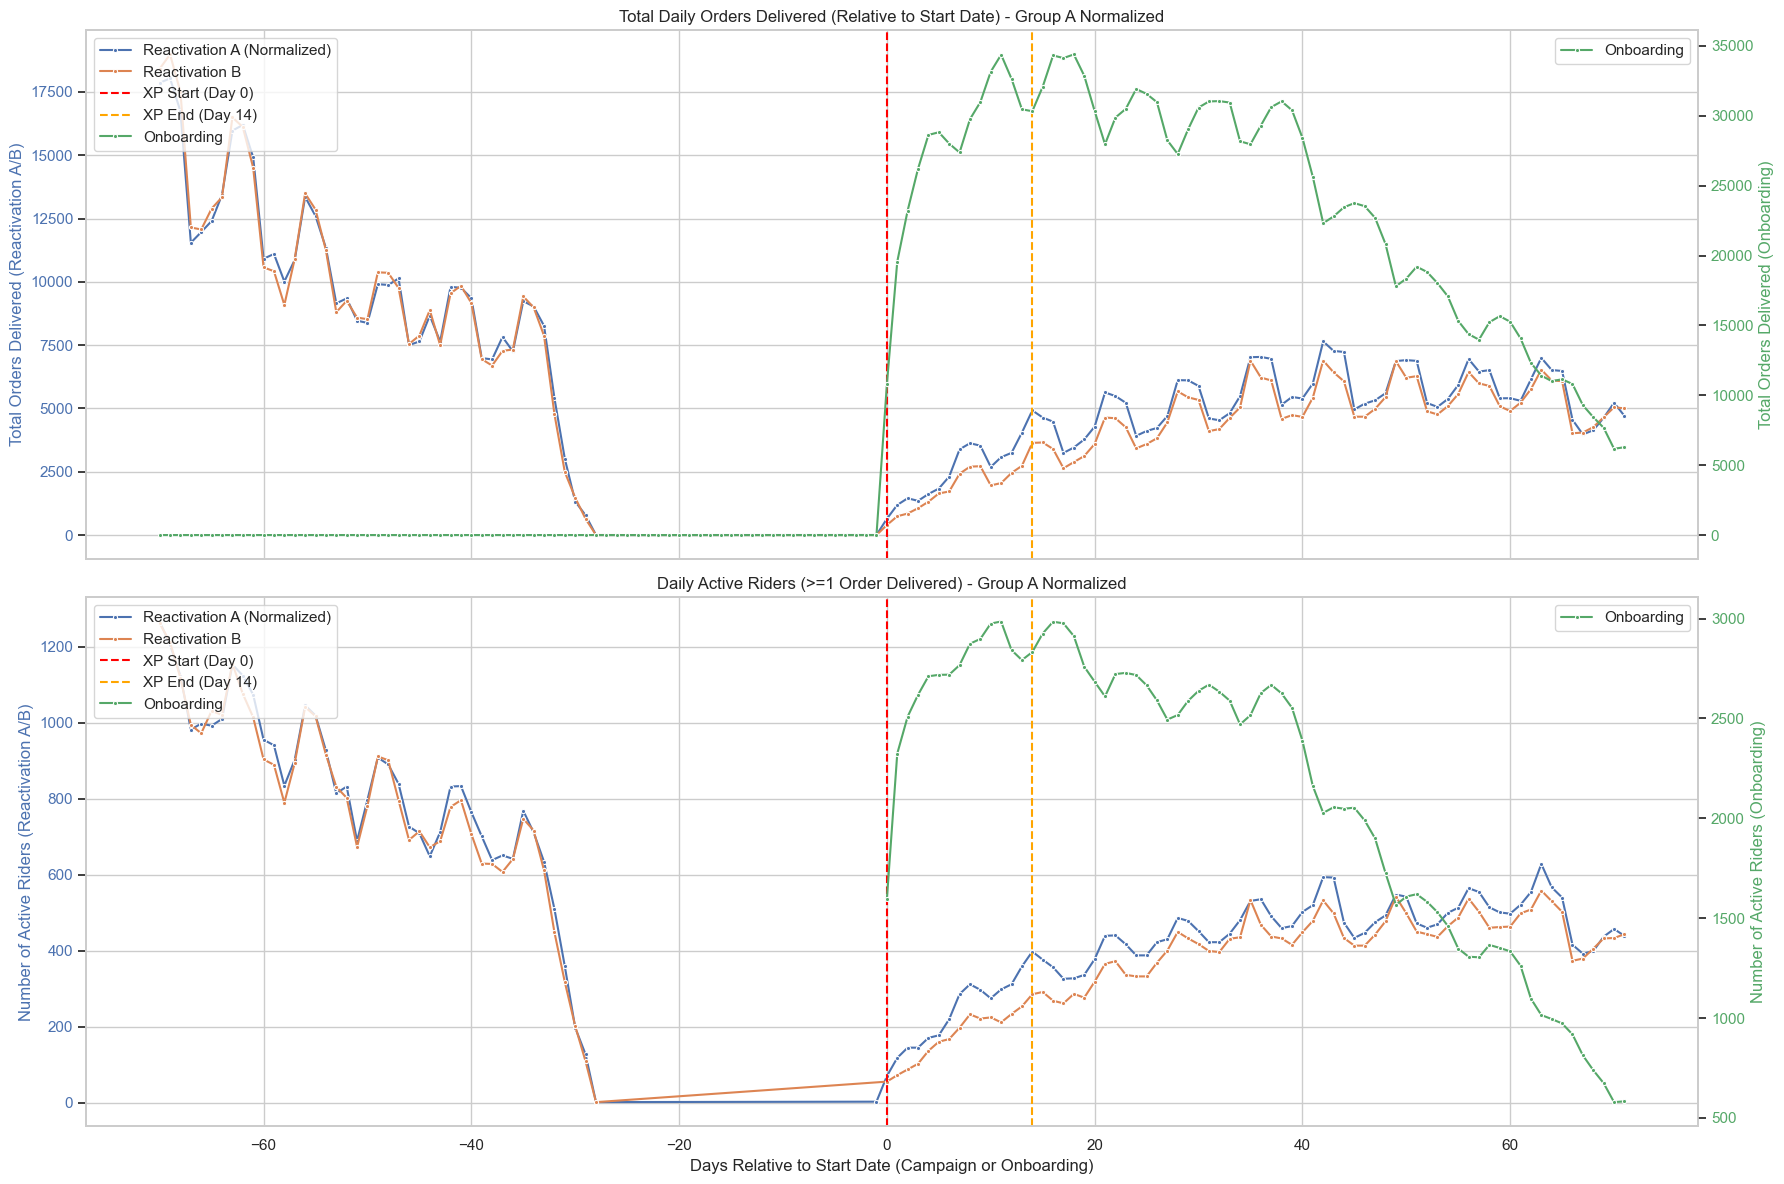

--- Daily Orders Head (Normalized A) ---
              Group  Relative_Day  Orders  Orders_Normalized
142  Reactivation A           -70   16150       17862.755338
143  Reactivation A           -69   16303       18031.981441
144  Reactivation A           -68   15127       16731.263158
145  Reactivation A           -67   10438       11544.980818
146  Reactivation A           -66   10818       11965.280944

--- Daily Active Riders Head (Normalized A) ---
             Group  Relative_Day  Active_Riders  Active_Riders_Normalized
72  Reactivation A           -70           1131               1266.163448
73  Reactivation A           -69           1076               1204.590513
74  Reactivation A           -68           1003               1122.866435
75  Reactivation A           -67            877                981.808438
76  Reactivation A           -66            891                997.481549


In [23]:
# --- Step 3: Normalize Group A and Plot with Dual Y-Axes --- 

import numpy as np # Needed for nan checks if averages are zero

# --- Calculate Normalization Factors (Based on Pre-XP Averages) --- 

pre_xp_period = daily_orders['Relative_Day'] < 0
pre_xp_period_active = daily_active_riders['Relative_Day'] < 0

# Calculate average pre-XP orders
avg_pre_orders_a = daily_orders[(daily_orders['Group'] == 'Reactivation A') & pre_xp_period]['Orders'].mean()
avg_pre_orders_b = daily_orders[(daily_orders['Group'] == 'Reactivation B') & pre_xp_period]['Orders'].mean()

# Calculate average pre-XP active riders
avg_pre_active_a = daily_active_riders[(daily_active_riders['Group'] == 'Reactivation A') & pre_xp_period_active]['Active_Riders'].mean()
avg_pre_active_b = daily_active_riders[(daily_active_riders['Group'] == 'Reactivation B') & pre_xp_period_active]['Active_Riders'].mean()

# Determine normalization factors (handle potential division by zero or NaN)
order_norm_factor = 1.0 # Default to 1 if calculation fails
if avg_pre_orders_a is not None and not np.isnan(avg_pre_orders_a) and avg_pre_orders_a != 0 and \
   avg_pre_orders_b is not None and not np.isnan(avg_pre_orders_b):
    order_norm_factor = avg_pre_orders_b / avg_pre_orders_a

active_norm_factor = 1.0 # Default to 1
if avg_pre_active_a is not None and not np.isnan(avg_pre_active_a) and avg_pre_active_a != 0 and \
   avg_pre_active_b is not None and not np.isnan(avg_pre_active_b):
    active_norm_factor = avg_pre_active_b / avg_pre_active_a


print(f"Pre-XP Avg Orders A: {avg_pre_orders_a:.2f}, B: {avg_pre_orders_b:.2f}, Norm Factor: {order_norm_factor:.2f}")
print(f"Pre-XP Avg Active A: {avg_pre_active_a:.2f}, B: {avg_pre_active_b:.2f}, Norm Factor: {active_norm_factor:.2f}")

# --- Apply Normalization --- 

daily_orders['Orders_Normalized'] = daily_orders['Orders'].copy()
daily_active_riders['Active_Riders_Normalized'] = daily_active_riders['Active_Riders'].copy()

# Apply normalization factor only to Group A
daily_orders.loc[daily_orders['Group'] == 'Reactivation A', 'Orders_Normalized'] = daily_orders.loc[daily_orders['Group'] == 'Reactivation A', 'Orders'] * order_norm_factor
daily_active_riders.loc[daily_active_riders['Group'] == 'Reactivation A', 'Active_Riders_Normalized'] = daily_active_riders.loc[daily_active_riders['Group'] == 'Reactivation A', 'Active_Riders'] * active_norm_factor

# --- Plotting with Dual Y-Axes --- 

sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 1, figsize=(18, 12), sharex=True) # Share x-axis

# -- Plot 1: Daily Order Volume -- 
ax1_orders = axes[0]
ax2_orders = ax1_orders.twinx() # instantiate a second axes that shares the same x-axis

# Get color palette
palette = sns.color_palette()
react_a_color = palette[0]
react_b_color = palette[1]
onboard_color = palette[2] # Typically green

# Plot Reactivation A (Normalized) and B on ax1
sns.lineplot(data=daily_orders[daily_orders['Group'] == 'Reactivation A'], 
             x='Relative_Day', y='Orders_Normalized', marker='.', ax=ax1_orders, label='Reactivation A (Normalized)', color=react_a_color)
sns.lineplot(data=daily_orders[daily_orders['Group'] == 'Reactivation B'], 
             x='Relative_Day', y='Orders', marker='.', ax=ax1_orders, label='Reactivation B', color=react_b_color)


# Plot Onboarding on ax2
sns.lineplot(data=daily_orders[daily_orders['Group'] == 'Onboarding'], 
             x='Relative_Day', y='Orders', marker='.', ax=ax2_orders, label='Onboarding', color=onboard_color) 
             
ax1_orders.set_title('Total Daily Orders Delivered (Relative to Start Date) - Group A Normalized')
ax1_orders.set_xlabel('Days Relative to Start Date (Campaign or Onboarding)')
ax1_orders.set_ylabel('Total Orders Delivered (Reactivation A/B)', color=react_a_color) # Use color of A/B lines
ax2_orders.set_ylabel('Total Orders Delivered (Onboarding)', color=onboard_color)
ax1_orders.tick_params(axis='y', labelcolor=react_a_color)
ax2_orders.tick_params(axis='y', labelcolor=onboard_color)

# Add vertical lines
min_day, max_day = daily_orders['Relative_Day'].min(), daily_orders['Relative_Day'].max()
vline_labels = {} # To avoid duplicate legend entries
if min_day <= 0 <= max_day:
     ax1_orders.axvline(x=0, color='red', linestyle='--', label='XP Start (Day 0)')
     vline_labels['XP Start (Day 0)'] = ax1_orders.lines[-1]
if min_day <= 14 <= max_day:
     ax1_orders.axvline(x=14, color='orange', linestyle='--', label='XP End (Day 14)')
     vline_labels['XP End (Day 14)'] = ax1_orders.lines[-1]

# Manually create legends
lines1, labels1 = ax1_orders.get_legend_handles_labels()
lines2, labels2 = ax2_orders.get_legend_handles_labels()

# Combine and place legend
all_lines = lines1 + lines2
all_labels = labels1 + labels2
# Filter out automatic lineplot labels if they exist to use explicit ones
unique_labels = {}
for line, label in zip(all_lines, all_labels):
     if label not in unique_labels and not label.startswith('_'):
         unique_labels[label] = line

ax1_orders.legend(unique_labels.values(), unique_labels.keys(), loc='upper left') 
ax1_orders.grid(True)
ax2_orders.grid(False) # Only show grid for primary axis

# -- Plot 2: Daily Active Riders -- 
ax1_active = axes[1]
ax2_active = ax1_active.twinx()

# Plot Reactivation A (Normalized) and B on ax1
sns.lineplot(data=daily_active_riders[daily_active_riders['Group'] == 'Reactivation A'], 
             x='Relative_Day', y='Active_Riders_Normalized', marker='.', ax=ax1_active, label='Reactivation A (Normalized)', color=react_a_color)
sns.lineplot(data=daily_active_riders[daily_active_riders['Group'] == 'Reactivation B'], 
             x='Relative_Day', y='Active_Riders', marker='.', ax=ax1_active, label='Reactivation B', color=react_b_color)

# Plot Onboarding on ax2
sns.lineplot(data=daily_active_riders[daily_active_riders['Group'] == 'Onboarding'], 
             x='Relative_Day', y='Active_Riders', marker='.', ax=ax2_active, label='Onboarding', color=onboard_color)

ax1_active.set_title('Daily Active Riders (>=1 Order Delivered) - Group A Normalized')
ax1_active.set_xlabel('Days Relative to Start Date (Campaign or Onboarding)')
ax1_active.set_ylabel('Number of Active Riders (Reactivation A/B)', color=react_a_color)
ax2_active.set_ylabel('Number of Active Riders (Onboarding)', color=onboard_color)
ax1_active.tick_params(axis='y', labelcolor=react_a_color)
ax2_active.tick_params(axis='y', labelcolor=onboard_color)

# Add vertical lines
min_day_act, max_day_act = daily_active_riders['Relative_Day'].min(), daily_active_riders['Relative_Day'].max()
vline_labels_act = {}
if min_day_act <= 0 <= max_day_act:
     ax1_active.axvline(x=0, color='red', linestyle='--', label='XP Start (Day 0)')
     vline_labels_act['XP Start (Day 0)'] = ax1_active.lines[-1]
if min_day_act <= 14 <= max_day_act:
     ax1_active.axvline(x=14, color='orange', linestyle='--', label='XP End (Day 14)')
     vline_labels_act['XP End (Day 14)'] = ax1_active.lines[-1]


# Manually create legends
lines1_act, labels1_act = ax1_active.get_legend_handles_labels()
lines2_act, labels2_act = ax2_active.get_legend_handles_labels()

all_lines_act = lines1_act + lines2_act
all_labels_act = labels1_act + labels2_act
unique_labels_act = {}
for line, label in zip(all_lines_act, all_labels_act):
      if label not in unique_labels_act and not label.startswith('_'):
         unique_labels_act[label] = line
         
ax1_active.legend(unique_labels_act.values(), unique_labels_act.keys(), loc='upper left') 
ax1_active.grid(True)
ax2_active.grid(False)

plt.tight_layout()
plt.show()

# Display head of normalized dataframes for verification
print("--- Daily Orders Head (Normalized A) ---")
print(daily_orders[daily_orders['Group'] != 'Onboarding'].head()) # Show A and B
print("\n--- Daily Active Riders Head (Normalized A) ---")
print(daily_active_riders[daily_active_riders['Group'] != 'Onboarding'].head()) # Show A and B